# Build basic 2-Layer MLP to solve the xor-Problem

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs #for data generatio

In [107]:
X, y = make_blobs(n_samples=200, n_features=2, cluster_std=.1
                  ,centers= [(1,1), (1,0), (0,0),(0,1)])

In [108]:
#make blobs into binary problem
y[y==2]=0
y[y==3]=1

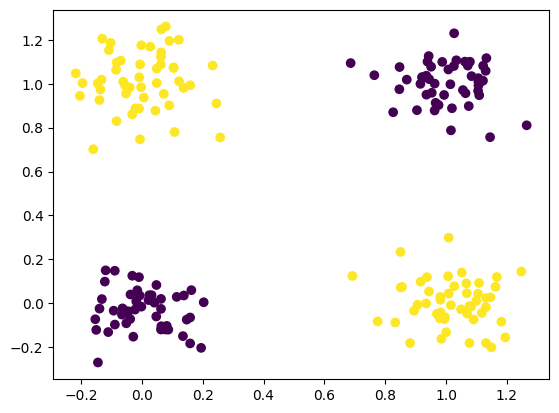

In [109]:
plt.scatter(X[:,0],X[:,1],c=y)

## Steps:
* build train and test sets
* write MLP class in Pytorch with two layers with adjustable number of perceptrons
* use nn.linear and nn.Sigmoid() units
* train your model
* test your model

In [110]:
# Train/Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

X_train = torch.tensor(X_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)

y_train = torch.tensor(y_train, dtype=torch.float32)

y_test = torch.tensor(y_test, dtype=torch.float32)

y_train = y_train.reshape(-1,1)

y_test = y_test.reshape(-1,1)


In [111]:
# MLP class

import torch
class Perceptron(torch.nn.Module):
  def __init__(self, num_percep):
    super(Perceptron, self).__init__()
    self.fc1 = torch.nn.Linear(2, num_percep, bias=False)
    self.fc2 = torch.nn.Linear(num_percep, 1, bias=False)
    self.non_linear = torch.nn.Sigmoid()


  def forward(self, x):
    output = self.fc1(x)
    output = self.fc2(output)
    output = self.non_linear(output)
    return output

In [112]:
# Train

model = Perceptron(2)

criterion = torch.nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

model.train()
epoch = 50


for epoch in range(epoch):
  optimizer.zero_grad()
  #froward
  y_pred = model(X_train)

  # compute loss
  loss = criterion(y_pred, y_train)
  print(f'epoch: {epoch}, loss: {loss.item()}')

  loss.backward()
  optimizer.step()



epoch: 0, loss: 0.6956313848495483
epoch: 1, loss: 0.6956287622451782
epoch: 2, loss: 0.6956261396408081
epoch: 3, loss: 0.6956234574317932
epoch: 4, loss: 0.6956208348274231
epoch: 5, loss: 0.6956182718276978
epoch: 6, loss: 0.6956155896186829
epoch: 7, loss: 0.6956130266189575
epoch: 8, loss: 0.6956104040145874
epoch: 9, loss: 0.6956077814102173
epoch: 10, loss: 0.6956052780151367
epoch: 11, loss: 0.6956025958061218
epoch: 12, loss: 0.6955999732017517
epoch: 13, loss: 0.6955973505973816
epoch: 14, loss: 0.695594847202301
epoch: 15, loss: 0.6955922245979309
epoch: 16, loss: 0.6955896019935608
epoch: 17, loss: 0.6955870985984802
epoch: 18, loss: 0.6955844759941101
epoch: 19, loss: 0.6955819129943848
epoch: 20, loss: 0.6955793499946594
epoch: 21, loss: 0.6955767273902893
epoch: 22, loss: 0.6955742835998535
epoch: 23, loss: 0.6955716609954834
epoch: 24, loss: 0.6955691576004028
epoch: 25, loss: 0.6955665349960327
epoch: 26, loss: 0.6955639719963074
epoch: 27, loss: 0.6955614686012268
epo

In [113]:
# test

model.eval()
y_pred = model(X_train)
y_pred = (y_pred > 0.5).int().flatten()
train_acc = torch.sum(y_pred == y_train)/y_train.shape[0]
print(f'train accuracy: {train_acc.float()}')

train accuracy: 88.73332977294922


In [114]:
model.eval()
y_pred_test = model(X_test)
y_pred_test = (y_pred_test > 0.5).int().flatten()
print(y_test.shape)
test_acc = torch.sum(y_pred_test == y_test)/y_test.shape[0]
print(f'test accuracy: {test_acc.float()}')

torch.Size([20, 1])
test accuracy: 11.0
